In [1]:
(require '[whittemore.core :refer [model q identify data define
                                   infer estimate measure categorical]]
         '[whittemore.io :refer [read-csv head]]
         '[whittemore.plot :refer [plot-p-map plot-univariate]])

In [2]:
(def smoking-data
  "Synthetic dataset; matches distribution Causality, pg. 84"
  (read-csv "data/smoking.csv"))

; show the first 10 samples
(head smoking-data)

:cancer,:smoker,:tar
"""no""","""no""","""no"""
"""no""","""no""","""no"""
"""yes""","""yes""","""yes"""
"""yes""","""yes""","""yes"""
"""no""","""no""","""no"""
"""yes""","""yes""","""yes"""
"""no""","""no""","""no"""
"""yes""","""no""","""no"""
"""no""","""no""","""no"""
"""no""","""no""","""no"""


In [3]:
(def smoking-distribution
  (categorical smoking-data))

(:support smoking-distribution)

{:cancer #{"yes" "no"}, :smoker #{"yes" "no"}, :tar #{"yes" "no"}}

In [4]:
(estimate smoking-distribution
  (q {:cancer "yes"} :given {:smoker "yes"}))

0.8525

In [5]:
(estimate smoking-distribution
  (q {:cancer "yes"} :given {:smoker "no"}))

0.0975

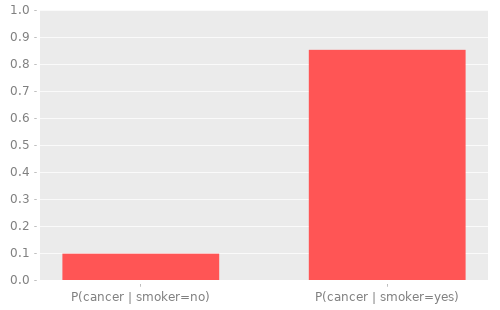

In [6]:
(plot-p-map
  {"P(cancer | smoker=yes)"
   (estimate smoking-distribution
     (q {:cancer "yes"} :given {:smoker "yes"})),
   "P(cancer | smoker=no)"
   (estimate smoking-distribution
     (q {:cancer "yes"} :given {:smoker "no"}))})

In [7]:
(def genotype-theory
  "From Causality, pg. 81"
  (model
    {:smoker []
     :tar [:smoker]
     :cancer [:tar]}
    #{:smoker :cancer}))

genotype-theory

In [8]:
(def adjustment
  (identify
    genotype-theory
    (q [:cancer] :do {:smoker "yes"})))

adjustment

In [9]:
(estimate smoking-distribution adjustment)

#whittemore.core.Categorical{:pmf {{:cancer "yes"} 0.45250000000000007, {:cancer "no"} 0.5475}}

In [10]:
(measure
  (estimate smoking-distribution adjustment)
  {:cancer "yes"})

0.45250000000000007

In [11]:
(infer
  genotype-theory
  smoking-distribution
  (q {:cancer "yes"} :do {:smoker "yes"}))

0.45250000000000007

In [12]:
(infer
  genotype-theory
  smoking-distribution
  (q {:cancer "yes"} :do {:smoker "no"}))

0.4975

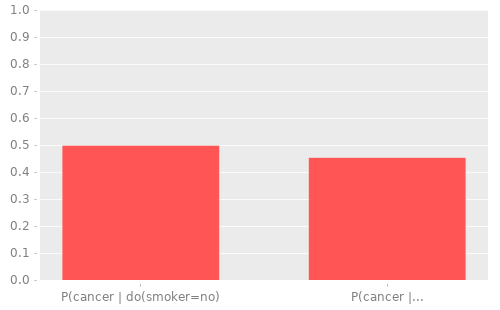

In [13]:
(plot-p-map
  {"P(cancer | do(smoker=yes))"
   (infer
     genotype-theory
     smoking-distribution
     (q {:cancer "yes"} :do {:smoker "yes"})),
   "P(cancer | do(smoker=no)"
   (infer
     genotype-theory
     smoking-distribution
     (q {:cancer "yes"} :do {:smoker "no"}))})

In [14]:
(identify 
  genotype-theory
  (data [:tar :smoker :cancer])
  (q [:cancer] :do [:smoker]))

In [15]:
(identify 
  genotype-theory
  (data [:smoker :cancer])
  (q [:cancer] :do [:smoker]))

#whittemore.core.Fail{:cause #{{:hedge #whittemore.core.Model{:pa {:smoker #{}, :cancer #{:smoker}}, :bi #{#{:smoker :cancer}}}, :s #{:cancer}}}}